<a href="https://colab.research.google.com/github/Afvanie/PCVK_Genap_2023/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

[[0 1 0]
 [1 1 1]
 [0 1 0]]


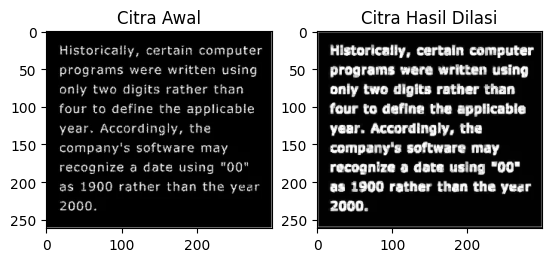

In [47]:
# Membaca gambar input
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png',0)

# Membuat Structuring Element (SED) berbentuk cross 3 x 3
kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Membuat gambar kosong untuk menampung hasil dilasi
dilated_img = np.zeros_like(img)

# Mendapatkan ukuran gambar input
height, width = img.shape

# Looping untuk melakukan operasi dilasi
for i in range(1, height-1):
    for j in range(1, width-1):
        # Melakukan dilasi pada setiap piksel pada gambar input
        dilated_pixel = np.max(img[i-1:i+2, j-1:j+2] + kernel)
        dilated_img[i, j] = dilated_pixel
print(kernel)
# Menampilkan gambar hasil dilasi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_img, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

4. **Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya) **

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

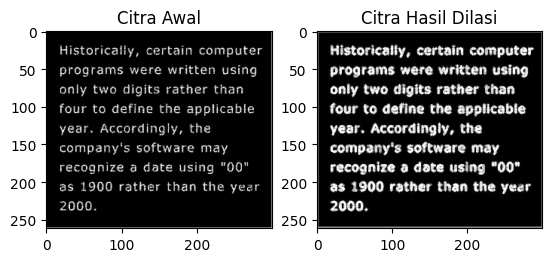

In [48]:
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png')
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
dilation = cv2.morphologyEx(img, cv2.MORPH_CROSS, kernel) #morphologyEX berfungsi untuk menghilangkan noise, 

print(kernel)
plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png) 


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

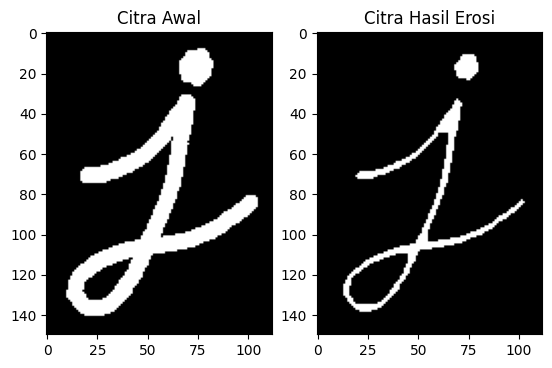

In [63]:
#Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
#Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
#openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambarj.png) 

img2 = cv2.imread('/content/drive/MyDrive/PCVK/j.png',0)

se = np.ones((5, 5), dtype=np.uint8)

# Membuat gambar kosong untuk menampung hasil erosi
eroded_img = np.zeros_like(img2)

# Mendapatkan ukuran gambar input
height, width = img2.shape

# Looping untuk melakukan operasi erosi
for i in range(2, height-2):
    for j in range(2, width-2):
        # Melakukan erosi pada setiap piksel pada gambar input
        eroded_pixel = np.min(img2[i-2:i+3, j-2:j+3] * se)
        eroded_img[i, j] = eroded_pixel

print(se)

plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(eroded_img, cmap='gray'), plt.title('Citra Hasil Erosi')


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

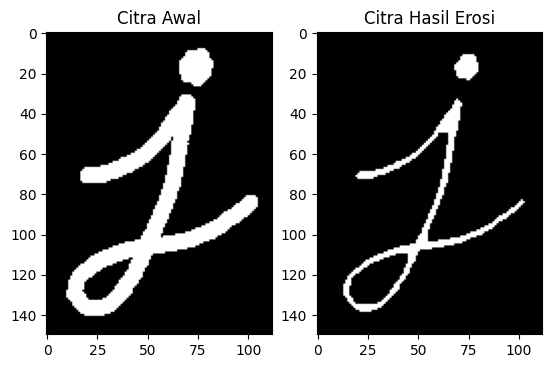

In [64]:

kernel = np.ones((5,5), np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png) 


<ipython-input-85-03ccc39c8bdb>:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


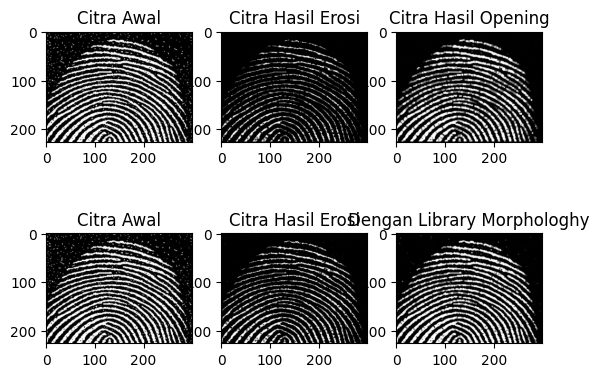

In [85]:
# Melakukan Load gambar yang akan dipakai yaitu fingerprint.png
img7 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

#Mendapatkan ukuran dari gambar
m, n = img7.shape

#Menampilkan gambar
plt.imshow(img7, cmap="gray")

# Mendefinisikan structure element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Mendefinisikan image baru dengan variable imgErode
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosi tanpa menggunakan library dari morphologhy
for i in range(constant, m-constant): #constant merupakan tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1] #temp berfungsi untuk menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#membaca image untuk delasi
img7_2 = imgErode

#mengambil ukuran dari gambar
p, q= img7_2.shape

#Menampilkan gamber
plt.imshow(img7_2, cmap="gray")

#Menetapkan gambar baru untuk menyimpan piksel gambar yang diperbesar
imgDilate = np.zeros((p,q), dtype=np.uint8)

#mendefinisikan structuring element 
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#operasi dilasitanpa menggunakan library cv2
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(231),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(232),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(233),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Opening')# Membaca image untuk operasi erosi


# Membaca gambar input
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png',0)

# Mendefinisikan Structuring Element (SED) berbentuk cross 3 x 3
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# Melakukan erosi pada gambar input dengan SED yang telah didefinisikan
eroded_img = cv2.erode(img,kernel,iterations = 1)

# Melakukan dilasi pada hasil erosi dengan SED yang sama
dilated_img = cv2.dilate(eroded_img,kernel,iterations = 1)

# Menampilkan gambar hasil

plt.subplot(234),plt.imshow(img,cmap = 'gray'),plt.title('Citra Awal')
plt.subplot(235),plt.imshow(eroded_img,cmap = 'gray'),plt.title('Citra Hasil Erosi')
plt.subplot(236),plt.imshow(dilated_img,cmap = 'gray'),plt.title('Citra Hasil Dilasi')

plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png) 

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png) 


10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png) 

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png) 


12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png) 